 <h1>Лабораторна робота №1</h1>
    <h2>Дослідження та візуалізація даних за допомогою Python</h2>
    <p><strong>Мета:</strong> отримати базові навики використання Python для дослідження та візуалізації даних.</p>
        <h3>Завдання:</h3>
        <ul>
            <li>1. Створіть функцію, яка приймає назву файлу та назву стовпця як параметр та повертає масив numpy зі значеннями стовпця.</li>
            <li>2. Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «APC» (Armored personnel carrier).</li>
            <li>3. Знайдіть добові втрати БТР.</li>
            <li>4. Знайдіть 5 найбільших добових втрат БТР.</li>
            <li>5. Визначте, скільки БТР було знищено влітку 2023 року.</li>
            <li>6. Знайдіть середнє значення знищених БТР за 100-500 днів війни.</li>
            <li>7. Створіть графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних).</li>

Задача 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_name = "D:/LB/LB python/russia_losses_equipment.csv"
data = pd.read_csv(file_name)

print(data.head())


         date   day  aircraft  helicopter  tank    APC  field artillery   MRL  \
0  2024-11-24  1005       369         329  9423  19209            20765  1254   
1  2024-11-23  1004       369         329  9419  19192            20760  1254   
2  2024-11-22  1003       369         329  9399  19156            20736  1254   
3  2024-11-21  1002       369         329  9398  19143            20731  1253   
4  2024-11-20  1001       369         329  9390  19119            20681  1252   

   military auto  fuel tank  drone  naval ship  anti-aircraft warfare  \
0            NaN        NaN  19366          28                   1004   
1            NaN        NaN  19365          28                   1004   
2            NaN        NaN  19260          28                   1004   
3            NaN        NaN  19259          28                   1003   
4            NaN        NaN  19202          28                   1001   

   special equipment  mobile SRBM system greatest losses direction  \
0   

Задача 2

In [6]:
def extract_column(file_name, column_name):
    df = pd.read_csv(file_name)
    return df[column_name].to_numpy()

apc_data = extract_column(r"D:/LB/LB python/russia_losses_equipment.csv", "APC")
print(apc_data[:10]) 



[19209 19192 19156 19143 19119 19092 19059 19021 18994 18968]


Задача 3

In [7]:
daily_losses = np.diff(apc_data)
print("Щоденні втрати БТР:", daily_losses[:10]) 


Щоденні втрати БТР: [-17 -36 -13 -24 -27 -33 -38 -27 -26 -21]


Задача 4

In [8]:
largest_losses = np.sort(daily_losses)[-5:]
print("5 найбільших втрат:", largest_losses)


5 найбільших втрат: [ 0  0  0  0 14]


Задача 5

In [9]:
dates = pd.to_datetime(data["date"])  
summer_2023 = (dates >= "2023-06-01") & (dates <= "2023-08-31")
summer_losses = np.sum(apc_data[summer_2023])
print("Втрати БТР влітку 2023 року:", summer_losses)


Втрати БТР влітку 2023 року: 739568


Задача 6

In [10]:
average_losses = np.mean(apc_data[100:500])
print("Середні втрати БТР за 100–500 днів:", average_losses)


Середні втрати БТР за 100–500 днів: 11936.8475


Задача 7

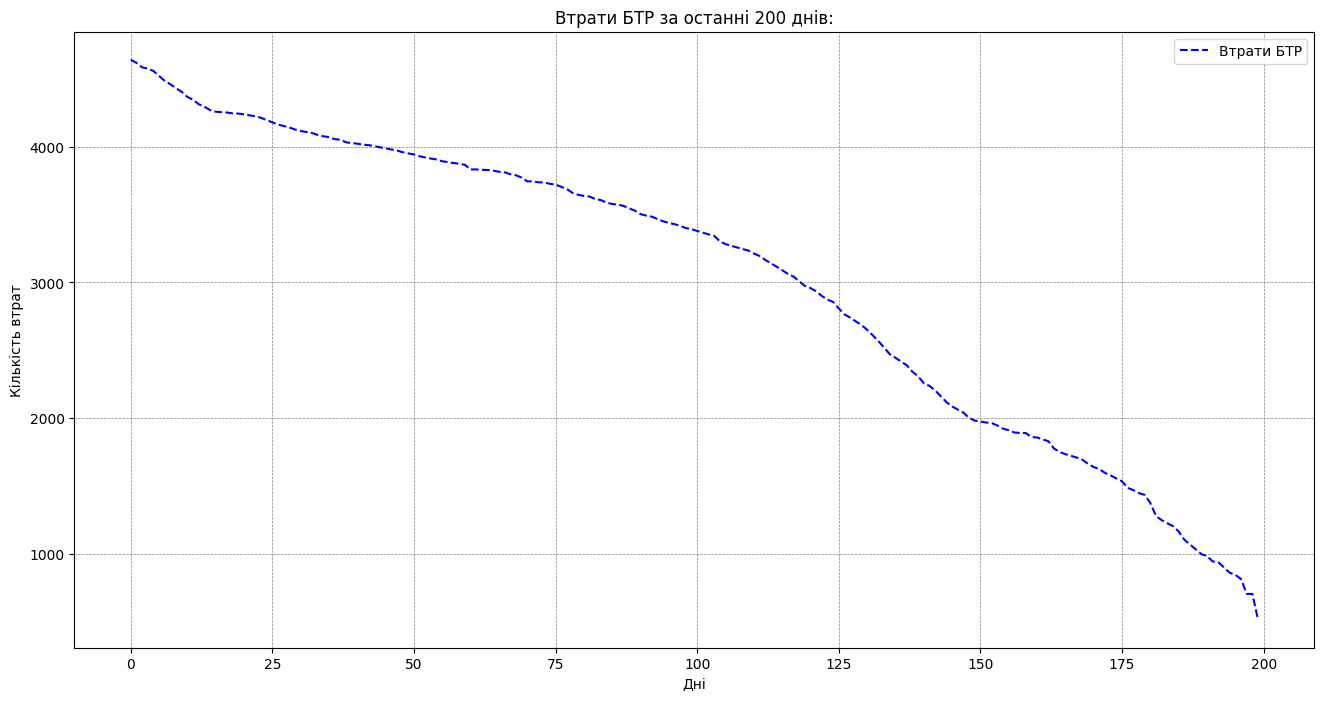

In [11]:
plt.figure(figsize=(16, 8), dpi=100)
plt.plot(apc_data[-200:], label="Втрати БТР", linestyle="--", color="blue")
plt.title("Втрати БТР за останні 200 днів:")
plt.xlabel("Дні")
plt.ylabel("Кількість втрат")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig("apc_losses.png")
plt.show()
